

## Analyzing Factors that Affect Airbnb Listing Performance in New York City

<font size='3'><b>Objective - </b> In less than two decades, Airbnb has become one of the major platforms with abundant resources of accommodation offerings. While it continuously maps the needs of guests and hosts, there are evidently some listings or hosts that have higher performance/popularity than others. Therefore, we use this dataset which includes listings’ activity and record in New York, so that we can analyze and visualize contributing factors on host performances. 


<font size='3'><b>Introduction: motivation and goal </b>  
 1. Motivation: not only that this analysis might shed some light on hosts’ strategy for their listings, but also that the results of our analysis can help customers to stay in a better location and experience at a more affordable price.
 2. Goal: Analyzing different factors about how to contributed to a successful Airbnb host, and what can be done to enhance the experience, customer reviews and attract more customers.

<font size='3'><b>A report summary</b> 
 - Our project starts with basic and general data exploration, during which we would also do basic data cleaning for a more efficient analysis in later phases. We will present to the audience the descriptions of columns in our dataset. Subsequently, we proceed to look more detailedly at the features of listings, such as geographic distribution, room type, host verification, and availability of listings. After that, we construct scenarios corresponding to different needs of the guests in reality, based on which we focus on flexibility, safety and price level. In addition, the project explores the most preferred and top-priced Airbnb listings probably for luxury travelers using some specific filters resulting from the project preceding analysis. Meanwhile, this particular scenario will reflect some interesting findings. Lastly, we will make a conclusion from which hosts might gain valuable insights, and also reflect on some limitations, which will be followed by the link and screenshot of our dashboard for visualizations.

## 1. Overview of dataset
   <b>Dataset:</b> 
   New York Airbnb Open Data [Kaggle Link](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata)

   Original source: Inside Airbnb http://insideairbnb.com/explore/

### 1.1 Original Dataset and Data Cleaning 

Note: In order to upload our raw dataset to Bigquery, we revised the column name with underscores manually.

We have done the data cleaning on GCP through Bigquery. Belew are our code for data cleaning for reference. 

--Generate preview for our original dataset, which includes 26 columns which includes 20 features for each unique host/listing ID.  
     
    %%bigquery
    SELECT (*) FROM `ba775-team6.Airbnb_Newyork.RAW_AIRBNB`
    LIMIT 5
 

-- To narrow down our exploration into factors that affects Airbnb performance on review score and price, we have modified our table by cleaning up the data and removing unnessary columns. 

--drop unnessary column for our analysis

    %%bigquery
    ALTER TABLE `ba775-team6.Airbnb_Newyork.RAW_AIRBNB`
    DROP COLUMN country; 

--detect data anomalies in column 'neighbourhood group'

    %%bigquery
    SELECT DISTINCT neighbourhood_group
    FROM ba775-team6.Airbnb_Newyork.RAW_AIRBNB_DS;


--correct neighbourhood_group with mis-spelling words. 
    
    %%bigquery
    UPDATE `ba775-team6.Airbnb_Newyork.RAW_DATA_AIRBNB`
    SET neighbourhood_group = 'Brooklyn' 
    WHERE neighbourhood_group = 'brookln';
    
    %%bigquery
    UPDATE `ba775-team6.Airbnb_Newyork.RAW_DATA_AIRBNB`
    SET neighbourhood_group = 'Manhattan' 
    WHERE neighbourhood_group = 'manhatan'; 


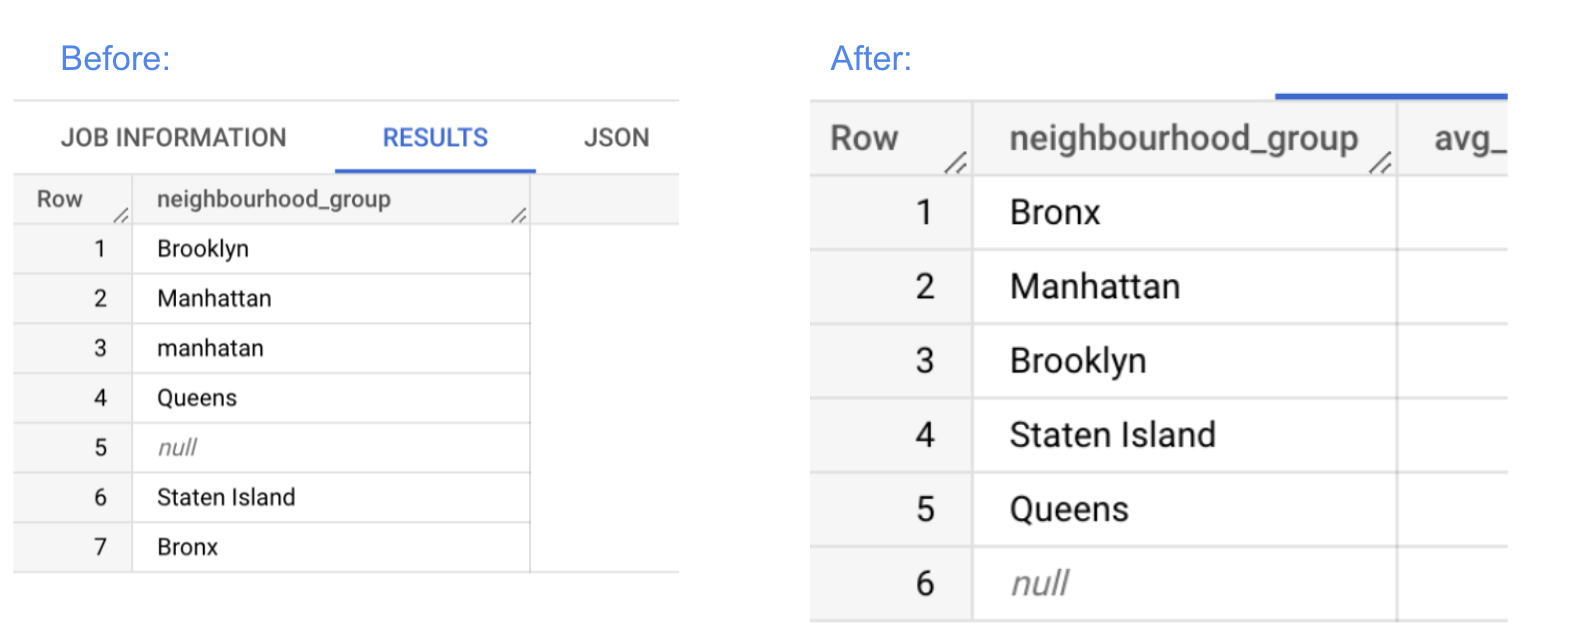

As you can see, we fix the name typo in 'neighbourhood_group' column by replacing 'manhatan' with 'Manhattan' and replacing 'brookln' with 'Brooklyn'

### 1.2 Cleaned Dataset Preview

In bigquery, we create a new table for a copy of our cleaned dataset. Here is the reference for code. 

    %%bigquery
    CREATE OR REPLACE `ba775-team6.Airbnb_Newyork.bnb1`
    AS 
    SELECT (*)
    FROM `ba775-team6.Airbnb_Newyork.RAW_DATA_AIRBNB`;

Preview -- 

In [ ]:
%%bigquery
SELECT *
FROM `ba775-team6.Airbnb_Newyork.bnb1`
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.32rows/s]


id                                               name      host_id  \
0  4249965                  Two bedroom in Prime East Village  28961369403   
1  8463461  Peaceful Artist Bedroomâ€”Just 30 Min to Manha...  78613255533   
2  8511511       Sunny Cozy Private Room in East Williamsburg   5062228697   
3  4251069  LG GARDEN Apt ON Sunset Park, on41ST near 6th Ave  38802469252   
4  4345513                Prime East Village One Bedroom Apt!  22376332748   

  host_identity_verified       host_name neighbourhood_group  \
0               verified              Jc           Manhattan   
1               verified  Ksenia & Masha            Brooklyn   
2               verified               J            Brooklyn   
3            unconfirmed           Katie            Brooklyn   
4               verified          Amanda           Manhattan   

        neighbourhood       lat      long  instant_bookable  ... service_fee  \
0        East Village  40.73045 -73.98392             False  ...        27.0   
1  Bedford-Stuyvesant  40.67762 -73.91590              True  ...       171.0   
2        Williamsburg  40.70750 -73.94055              True  ...         NaN   
3         Sunset Park  40.65031 -74.00239              True  ...       218.0   
4        East Village  40.72847 -73.98682             False  ...       149.0   

  minimum_nights  number_of_reviews  last_review  reviews_per_month  \
0              4                  8   2018-12-14               0.19   
1              3                 69   2019-01-19               1.70   
2              1                 29   2019-04-06               0.77   
3              2                 51   2019-01-07               0.89   
4              5                  3   2015-03-08               0.05   

   review_rate_number  calculated_host_listings_count availability_365  \
0                   5                               2               96   
1                   5                               6              269   
2                   2                               3              244   
3                   4                               1               65   
4                   1                               1              415   

                                         house_rules  \
0                                               None   
1                  Please be respectful, Thank you !   
2  Our family will be present in the same house, ...   
3                                               None   
4                                         No Smoking   

   price_relative_to_average  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 24 columns]

### 1.3 Data Description
- id: Airbnb unique identifer for the listing
- name: name of the listing
- host_id: Airbnb unique identifer for the host
- host_identity_verified: Airbnb host identity verification 
- host_name: name of the host, usually just the first name
- neighbourhood_group: listing location by different boroughs in New York city
- neighbourhood: listing location by different neighborhood in different boroughs
- lat: latitude recorded using the World Geodetic System (WGS84) projection
- long:  longitude recorded using the World Geodetic System (WGS84) projection
- instant_bookable: [t=true; f=false]. Whether the guest can automatically book the listing without the host requiring to accept their booking request. 
- cancellation_policy: cancellation policies are categorized into the following three descriptions:
    - flexible: cancel until 24 hr before check-in for a full refund
    - moderate: cancel until until 5 days before check-in for a full refund
    - strict: To receive a full refund, guests must cancel within 48 hours of booking, and the cancellation must occur at least 14 days before check-in; If cancellation happens between 7 and 14 days before check-in, guests are required to paid 50% for all nights
- room_type: all homes are grouped into the following three room types: 
    - entire place 
    - private room
    - shared room
- construction_year: the year when the building of a particular listing was constructed
- price: daily price in local currency
- service_fee: a fee calculated from the booking subtotal, which varies based on a variety of factors and is shown during checkout
- minimum_nights: minimum number of night stay for the listing (calendar rules may be different)
- number_of_reviews: the number of reviews the listing has
- review_rate_number: the review rate score shown on the listing; an indicator of host’s performance
- availability_365: the number of days the facility is available to be booked in the future 365 days; an indicator of host’s performance
- house_rules: set by hosts; the rules are expected to be met by guests 

- price_relative_to_average: It is a new column that we add based on our calculation for the price of a particular listing divided by average price and different room type. Further explanation will be provided in section 3.1.3

## 2. Listing Features Exploration
Clarification on listing features
- We use <u>review</u> as an indicator of host performance according to consumer experience. In this way, we want to gain  insight from consumer level in order to help host improve their listing performance. 
    - In particular, <b>review score</b> reflects an overall average of cusomter experience on the listing.
    - Because this dataset does not have a direct indicator of listing popularity, such as occupancy rate. In this case, we use <b>number of reviews</b> to reflect whether the listing is popular or not.
<br>
- We use <b>price</b> to represent listing value.  
- <b>Availability 365</b> represents the days that will available for booking in the next 365 days. We assume that the smaller the number of this value(availability_365), more bookings have been made on this listing.

### 2.1 If each host id is unique for each record? Or there will be mutiple listing owned by same host? 

In [ ]:
%%bigquery
SELECT DISTINCT (listing_count_by_each_host)
FROM
(SELECT COUNT(DISTINCT id) as listing_count_by_each_host, host_id
FROM `ba775-team6.Airbnb_Newyork.bnb1`
GROUP BY host_id
ORDER BY listing_count_by_each_host DESC)

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.32s/rows]


listing_count_by_each_host
0                           1

In this dataset, each record(id) is owned by a unique property(host_id). So we will assume each host only have one listing. 

However, we must recognize that in reality, one host may own more than one property. In this case, for host who have mutiple listings, it would generate more reviews for the listings in total, which will creates a great bonus for the host in search results and therefore attract users to click through.  

### 2.2 Geographic distribution for listings in New York City

In [ ]:
%%bigquery
SELECT DISTINCT neighbourhood_group, count(*) number_of_listings, 
ROUND(100*(COUNT(*)/(SELECT COUNT(*) FROM `ba775-team6.Airbnb_Newyork.bnb1`)),2) AS percentage_of_listings
FROM `ba775-team6.Airbnb_Newyork.bnb1`
WHERE neighbourhood_group IS NOT NULL
GROUP BY neighbourhood_group
ORDER BY number_of_listings DESC;

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.22rows/s]


neighbourhood_group  number_of_listings  percentage_of_listings
0           Manhattan                7715                   47.09
1            Brooklyn                7084                   43.24
2              Queens                1278                    7.80
3               Bronx                 206                    1.26
4       Staten Island                  73                    0.45

- As we can see, there are 5 boroughs(smaller cities in NYC):<b>{Manhattan, Brooklyn, Queens, Bronx, Staten Island}</b>.<br><br>From above, we can draw that <b>Manhattan</b> has 47% of total listings which is highest and <b>Brooklyn</b> has 43.2% of total listings which is second highest. <br><br>Each of borough have dozens of neighbourhood, we will not list them here but you can see how they distribute in different areas in our later visualization dashboard



### 2.3 Q1 - Which area is most favored depending on average review score? <br> Q2 - Which area is most expensive?

In [ ]:
%%bigquery
SELECT DISTINCT neighbourhood_group, 
COUNT(*) number_of_listings,
ROUND(AVG(review_rate_number),2) AS average_review_score,
ROUND(AVG(price),2) AS average_price
FROM `ba775-team6.Airbnb_Newyork.bnb1`
WHERE neighbourhood_group IS NOT NULL
GROUP BY neighbourhood_group
ORDER BY average_review_score DESC, average_price DESC;

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.38rows/s]


neighbourhood_group  number_of_listings  average_review_score  average_price
0       Staten Island                  73                  3.16         625.16
1           Manhattan                7715                  3.01         616.54
2            Brooklyn                7084                  2.99         618.22
3               Bronx                 206                  2.97         592.54
4              Queens                1278                  2.96         631.41

<b>Q1:</b> Although Staten Island have the highest average review score with 3.15, but parallely the number of listing (with only 27 listings) is much less than Manhattan (more than 7000 listings). <br><br>Therefore, according to the data, Manhattan is the neighbourhood group with a maximum number of listings that maintaining a good value of avgerage review score and we can assume Manhattan to be the most favoured area (neighbourhood group)

<b>Q2: </b> From above we can see that, Queens has the highest avgerage price with 631.41 USD per listing with 1278 number of listings, which states less number of listings & more average value - Therefore we can see a pattern of each airbnb with expensive rates. 

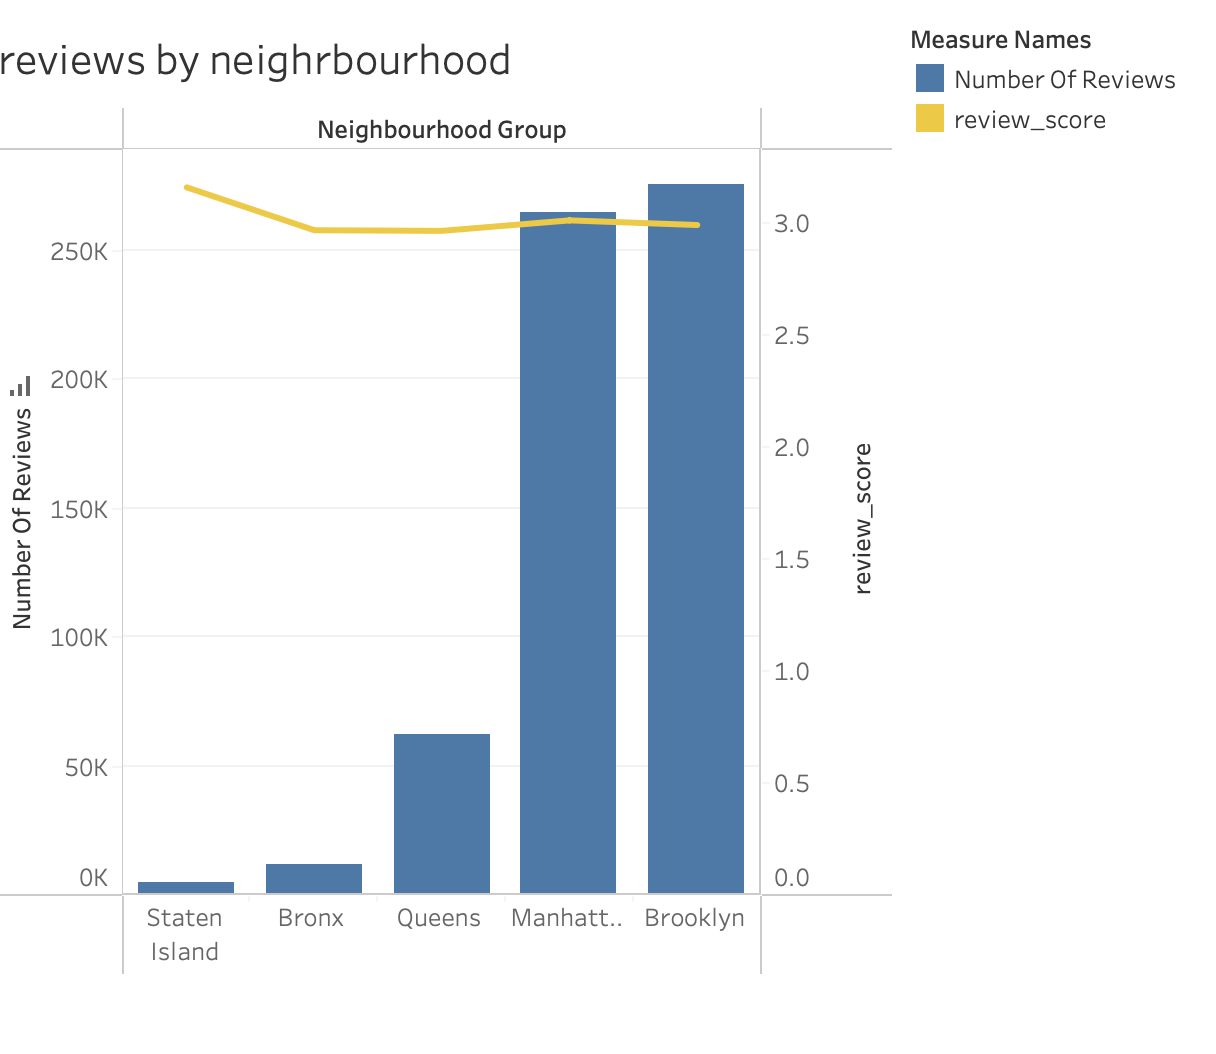

### 2.4 Q1 - Which type of room weights the most? <br> Q2 - Which type get the highest review score in average? <br>Q3 - Which room type cost most in average?

In [ ]:
%%bigquery 
SELECT room_type,COUNT(*) AS number_of_type, 
ROUND(AVG(review_rate_number),2) AS average_review_score, 
ROUND(AVG(number_of_reviews),2) AS average_number_of_reviews,222
ROUND(AVG(price),2) AS average_price,
SUM(number_of_reviews) AS number_of_reviews
FROM `ba775-team6.Airbnb_Newyork.bnb1`
GROUP BY room_type
ORDER BY number_of_type DESC, average_review_score DESC, average_number_of_reviews DESC;

Downloading: 100%|██████████| 3/3 [00:01<00:00,  2.21rows/s]


room_type  number_of_type  average_review_score  \
0  Entire home/apt            9279                  2.99   
1     Private room            6864                  3.00   
2      Shared room             240                  3.02   

   average_number_of_reviews  average_price  number_of_reviews  
0                      36.11         615.33             334662  
1                      40.76         621.04             279545  
2                      35.11         654.19               8426

<b>Q1:</b> The Entire home/apt weights the most, which have the number of 9279, far more than the other two categories.

<b>Q2:</b> Although the shared room gets the highest review score in average. However, due to the small sample size of only 8426 reviews, it cannot be considered a general conclusion that the experience of other types of rooms was not as good as it was.

<b>Q3:</b> In terms of results, Shared room cost most in average. For the same reason as the Q2(small sample size), maybe we need further study.

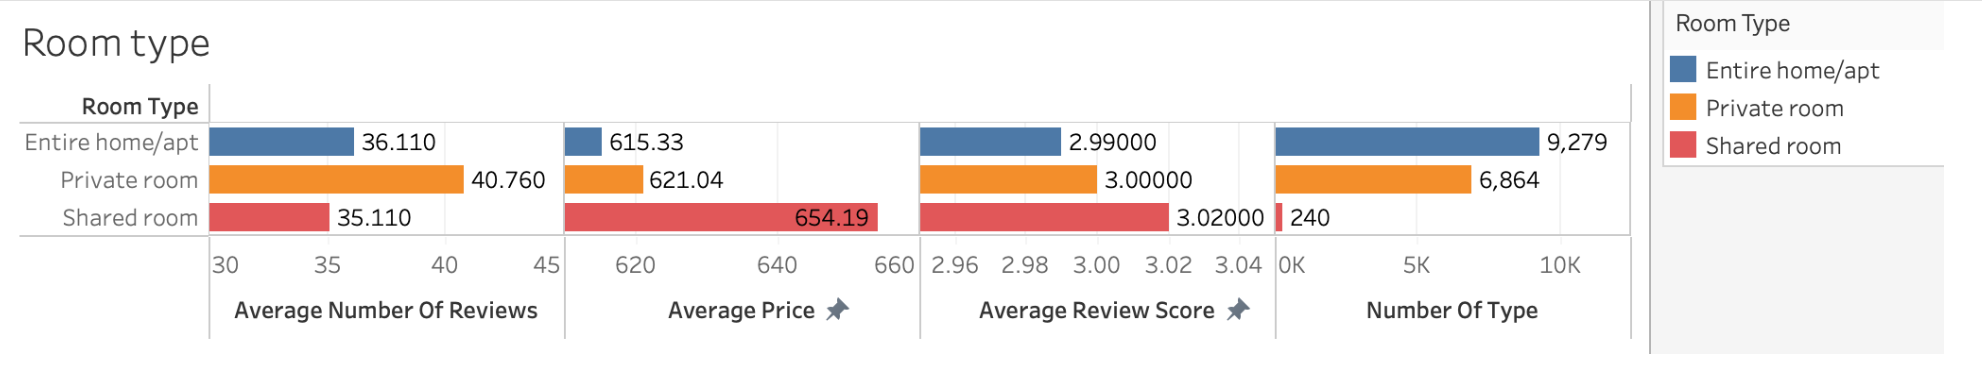

### 2.5  Q1 - If the listing is not allow to book instantly, would it affect review score? <br>Q2 - How about number of reviews? </br>Q3 - How about price?

In [ ]:
%%bigquery
SELECT (CASE WHEN instant_bookable = True THEN 'allow'
        WHEN instant_bookable = False THEN 'not allow' END) AS instant_bookable,
ROUND(AVG(review_rate_number),2) AS review_score,
ROUND(AVG(price),2) AS average_price,
ROUND(AVG(number_of_reviews),2) as average_number_of_reviews
FROM `ba775-team6.Airbnb_Newyork.bnb1`
WHERE instant_bookable IS NOT NULL
GROUP BY instant_bookable

Downloading: 100%|██████████| 2/2 [00:02<00:00,  1.27s/rows]


instant_bookable  review_score  average_price  average_number_of_reviews
0        not allow          3.02         622.07                      37.67
1            allow          2.97         614.19                      37.87

<b>Q1:</b> Average rating score for those allow instant booking is overall lower than those do not allow. <br>Although the difference is small, it is possible that instant booking would lead to bad review score as people who book instantly may not carefully read through the house rules and review comments therefore book the property that does not meet his expectation

<b>Q2:</b> Average number of reviews for those allow instant booking is higer than those do not allow. <br>We can assume that listing that allow instant booking is more popular than those do not allow. So it is encouraged for hosts to provide their listing in a more flexible way. 

<b>Q3:</b> For price, listing that allow instant booking is higher than listing not allot instant booking by 8 dollars difference in average. It is possible that hosts want to increase transaction speed by increase users's desire to book with a lower price and a convenience to book instantly.


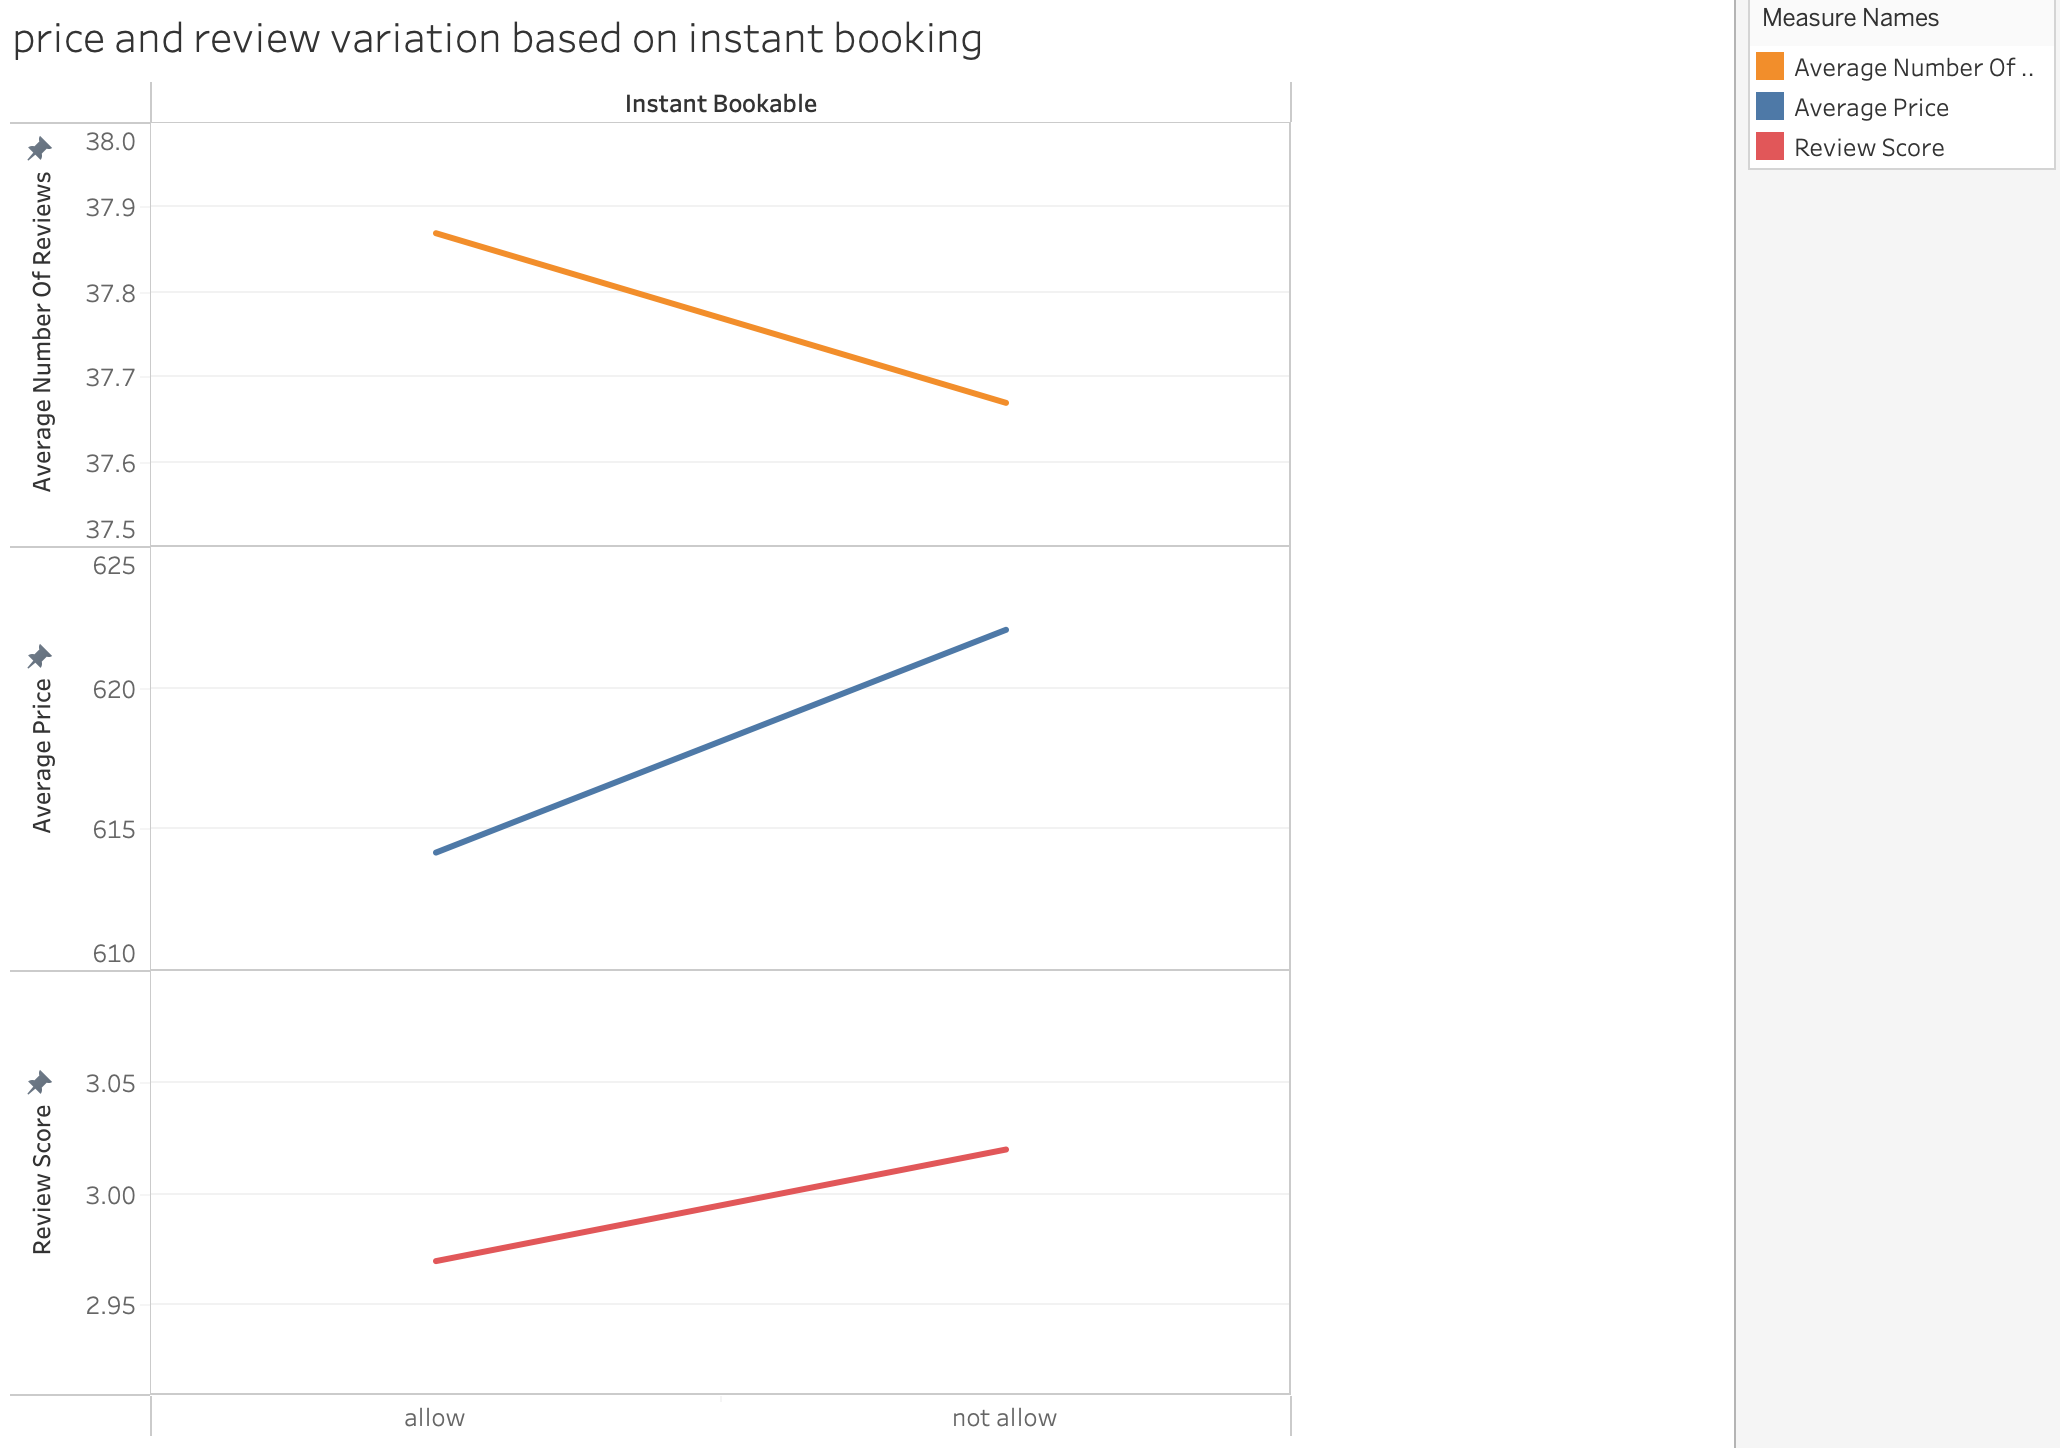

### 2.6 Q1 - How many hosts are verified? <r>Q2 - Does host verification affect number of reviews?</r> Q3 - How about review scores? 
- We expect to see verified host will attract more guests since host verification is a great way to show if the trustyworthy or not

In [ ]:
%%bigquery
SELECT host_identity_verified, COUNT(*) AS count,
       ROUND(AVG(number_of_reviews),2) AS average_number_of_reviews,
       ROUND(AVG(review_rate_number),2) AS average_review_score
FROM `ba775-team6.Airbnb_Newyork.bnb1`
WHERE host_identity_verified IN ('unconfirmed','verified')
GROUP BY host_identity_verified;

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.54rows/s]


host_identity_verified  count  average_number_of_reviews  \
0               verified   8089                      37.87   
1            unconfirmed   8199                      37.56   

   average_review_score  
0                  3.01  
1                  2.98

<b>Q1:</b> The number of verified hosts are smaller than that of unconfirmed hosts. In this case, we recommend Airbnb to promote unverified  hosts to complete the id verification by email reminder, in order to attract more users and increase bookings rate. 

<b>Q2:</b> From above you can see the average number of reviews of verified hosts is higher than that of unconfirmed hosts. Although the different is small, it does meet our expectation that verified host will attract more guests with 0.3 point higher in average number of reviews than unconfirmed hosts.

<b>Q3:</b> The average review score of verified hosts is a little higher than the score of unconfirmed hosts, but the difference is not significant. We can still assume that the verified hosts are a bit better in overall performance

<b>In general</b>, we can conclude that verified hosts perform better than unverified hosts based on reviews.

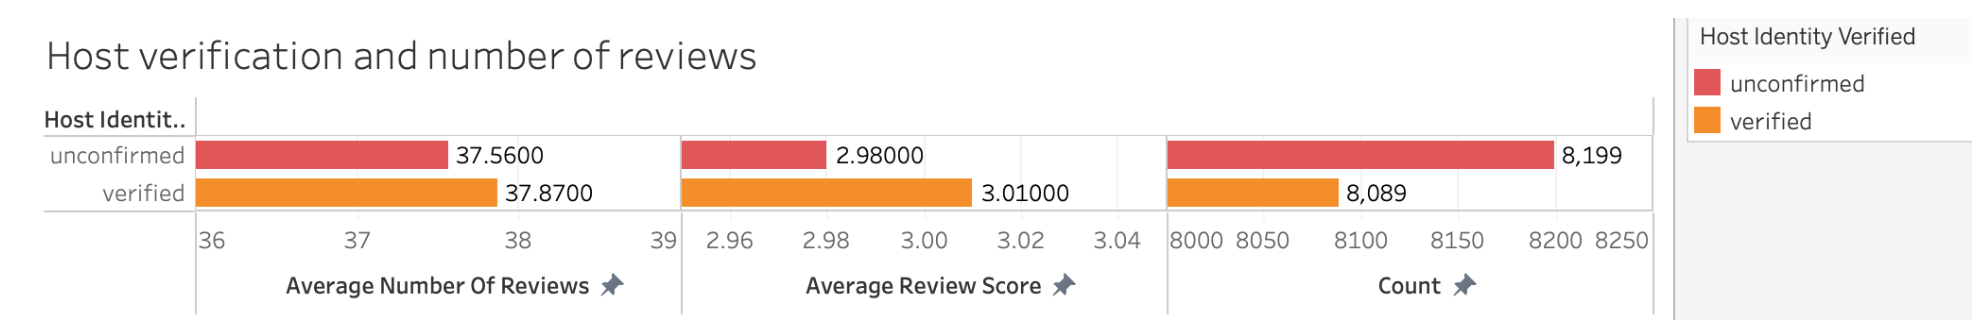

### 2.7 Would availability of listing affect price?
- a analysis through equal division of dataset 

In [ ]:
%%bigquery
SELECT ROUND(AVG(availability_365)) AS average_yearly_availability
FROM `ba775-team6.Airbnb_Newyork.bnb1`
WHERE availability_365 IS NOT NULL


Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.29s/rows]


average_yearly_availability
0                        208.0

We can see that average availabilty in days for a listing in NYC is 208 days

In the next step, getting insights on relation between availability and price we are using the quartile method to divide the dataset into 4 sets of data.

In [ ]:
%%bigquery
SELECT
    availability_quartile,
    ROUND(AVG(availability_365),2) AS average_availability,
    ROUND(AVG(price),2) AS average_price,
    neighbourhood_group, room_type
   
FROM
    (SELECT price, reviews_per_month,
     availability_365, NTILE(4) OVER(ORDER BY availability_365) AS availability_quartile,
     neighbourhood_group, room_type
    FROM `ba775-team6.Airbnb_Newyork.bnb1`
    WHERE availability_365 IS NOT NULL
    ) 
WHERE neighbourhood_group IN ('Manhattan','Brooklyn','Queens')
AND room_type IN ('Entire home/apt','Private room','Shared room')
GROUP BY availability_quartile, neighbourhood_group,room_type
ORDER BY availability_quartile
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.03rows/s]


availability_quartile  average_availability  average_price  \
0                      1                 46.10         739.25   
1                      1                 45.65         609.17   
2                      1                 44.57         626.65   
3                      1                 29.43         768.14   
4                      1                 51.93         605.00   

  neighbourhood_group        room_type  
0           Manhattan      Shared room  
1           Manhattan  Entire home/apt  
2           Manhattan     Private room  
3              Queens      Shared room  
4            Brooklyn      Shared room

In [ ]:
%%bigquery
SELECT
    availability_quartile,
    ROUND(AVG(availability_365),2) AS average_availability,
    ROUND(AVG(price),2) AS average_price,
    
FROM
    (SELECT price, reviews_per_month,
     availability_365, NTILE(4) OVER(ORDER BY availability_365) AS availability_quartile,
    FROM `ba775-team6.Airbnb_Newyork.bnb1`
    WHERE availability_365 IS NOT NULL
    ) 
GROUP BY availability_quartile
ORDER BY availability_quartile

Downloading: 100%|██████████| 4/4 [00:01<00:00,  3.48rows/s]


availability_quartile  average_availability  average_price
0                      1                 44.47         616.84
1                      2                153.86         620.31
2                      3                262.65         615.03
3                      4                371.63         622.30

By drawing a distribution graph as follows, we can clearly see that Availability and Prices increase proportionately, as the overall graph of average price seems to be an upward linear graph. Therefore, increasing availability can be considered as one of the factor to increase listing performance on price for hosts in NYC.

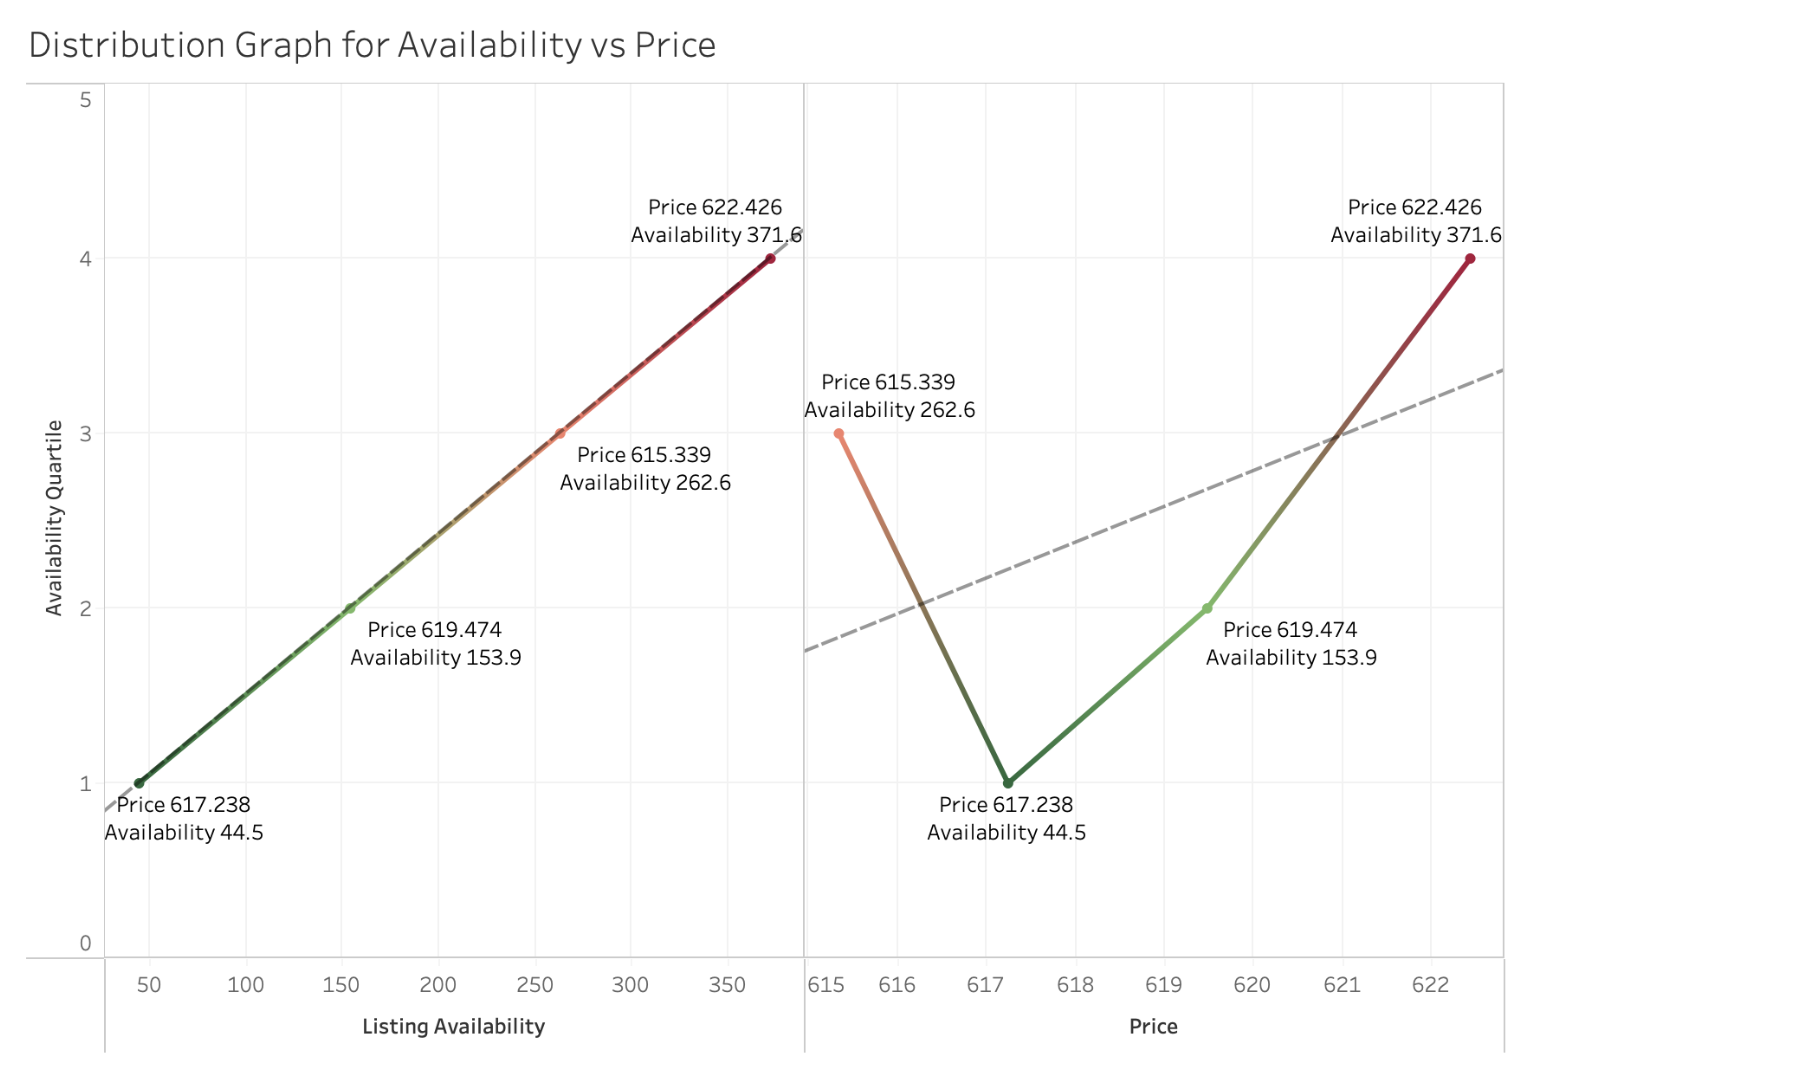

### 2.8 Q1 - How does price vary with different room type? Q2 - How does number of reviews vary with different room type?

In [ ]:
%%bigquery
SELECT 
    room_type, 
    COUNT(room_type) AS count_per_room_type, 
    ROUND(avg(number_of_reviews), 2) AS average_number_of_reviews,
    ROUND(avg(price),2) AS averge_price 
FROM `ba775-team6.Airbnb_Newyork.bnb1`
GROUP BY room_type
ORDER BY average_number_of_reviews;

Downloading: 100%|██████████| 3/3 [00:01<00:00,  2.17rows/s]


room_type  count_per_room_type  average_number_of_reviews  \
0      Shared room                  240                      35.11   
1  Entire home/apt                 9279                      36.11   
2     Private room                 6864                      40.76   

   averge_price  
0        654.19  
1        615.33  
2        621.04

It is observed with the above outcome that -

Room type with highest average number of reviews  doesn't hold the highest average price, hence the most popular room type (i.e Private room) has average price of 621.04 which is lesser than less popular room type (i.e Shared room).

It is abnormal to see private rooms are cheaper while shared room are expensive than private one which has less popularity.

### 2.9 Q1 - Does room rules affect listing review score?  Q2 - How about price?
<font size = '3'> 
   According to the word cloud, which shows the words frequency in house_rules of the airbnbs. Apart from the polite use of words and articulation, in this area of equipment dishes,cooking are mentioned very frequently in the rules, so we chose these 2 keywords to study.


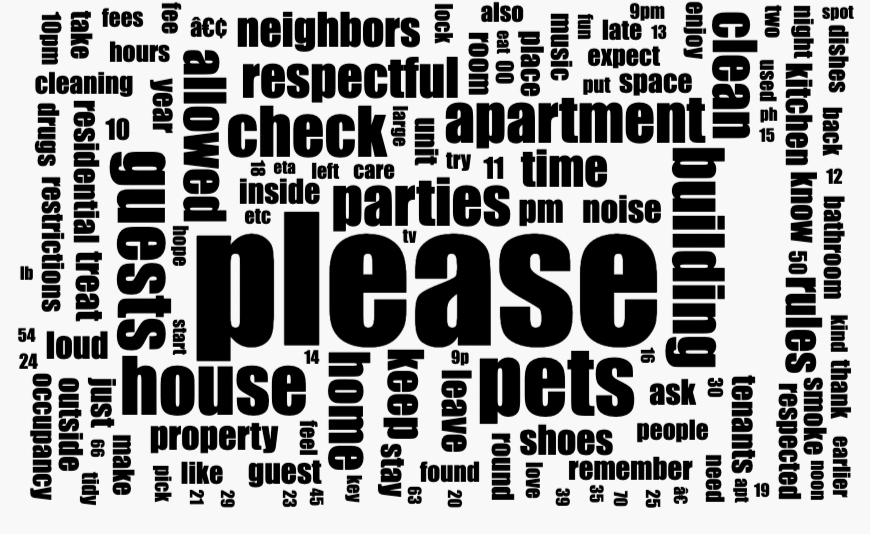

As you can see in the word cloud figure of the airbnbs that get the 5 score in review, pets,smoking,shoes are mentioned very frequently in the rules, so we chose these keywords to study.

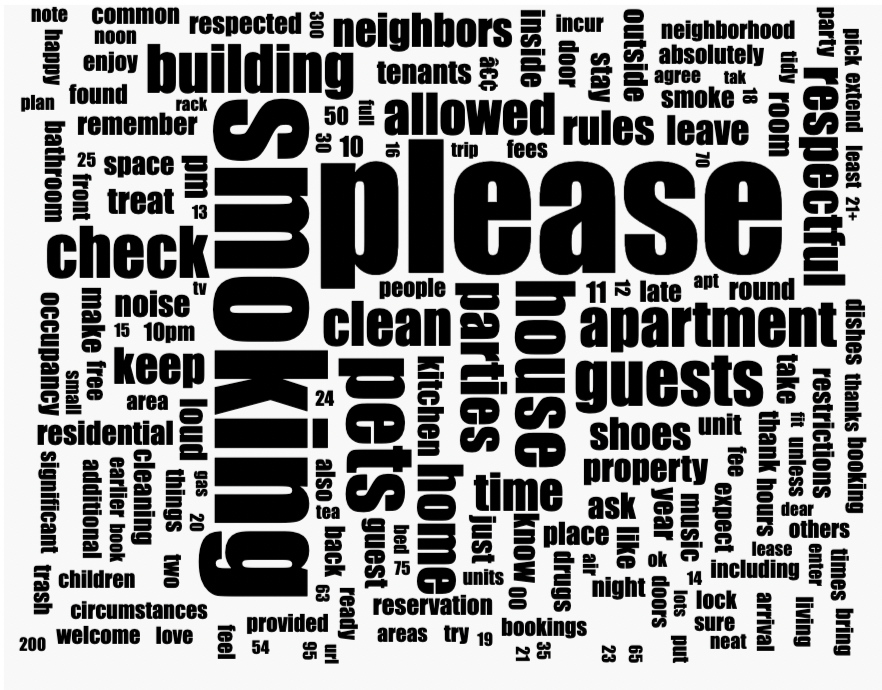

<b>2.9.1 no laundry vs laundry</b>

The review score of having laundry room of house is 3.3617, compared to the average of all review score which is 2.9886 

Having a laundry room will greatly improve user feedback.

In [ ]:
%%bigquery
SELECT (CASE WHEN house_rules like "%laundry%"   THEN 'laundry'
        WHEN house_rules is not null THEN 'all' END) as having_laundry_or_not,
ROUND(AVG(review_rate_number),4) AS review_score,
ROUND(AVG(price),4) AS average_price,
FROM `ba775-team6.Airbnb_Newyork.bnb1`
WHERE house_rules IS NOT NULL
GROUP BY having_laundry_or_not

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.49rows/s]


having_laundry_or_not  review_score  average_price
0                   all        2.9886       615.6511
1               laundry        3.3617       529.6042

<b>2.9.2 cooking amenity</b>  

The review score of forbidden cooking of house is 2.95, compared to the average of all review score which is 2.99. 

Offering ktichen and allowing cooking will greatly improve user feedback.
(However, the keyword filter on whether cooking is allowed or not is not precise, for example some aibnb just don't allow cooking at certain times, but usually do, so this conclusion is for reference only）

In [ ]:
%%bigquery
SELECT (CASE WHEN house_rules not like "%kitchen%" 
     and house_rules like "%no%cooking%"   THEN 'not_cooking'
        WHEN house_rules is not null THEN 'all' END) as allow_cooking_or_not,
ROUND(AVG(review_rate_number),4) AS review_score,
ROUND(AVG(price),4) AS average_price,
FROM `ba775-team6.Airbnb_Newyork.bnb1`
WHERE house_rules IS NOT NULL
GROUP BY allow_cooking_or_not

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.60rows/s]


allow_cooking_or_not  review_score  average_price
0                  all        2.9904       615.3330
1          not_cooking        2.9545       577.5909

<b>2.9.3 strict or not</b> 

Even though the conditions for filtering whether house_rules is strict or moderate are rather trivial, we have therefore taken six decimal results. We can see that there is still a difference between strict and non-strict ratings, even if it is not large, which shows that the way the airbnbs handles the details affects the rating and the price. The stricter the conditions, for example, fobidden smoking or pets, the better the experience of the resident and the more expensive it will be.

In [ ]:
%%bigquery
SELECT (CASE WHEN  house_rules like "%no%smoke%" or house_rules  like "%nosmoking%" or house_rules  like "%no%shoes%" or house_rules  like "%no%pet%" or house_rules  like "%no%pets%"  THEN 'strict'
        WHEN house_rules is not null THEN 'moderate' END) as strict_or_not,
ROUND(AVG(review_rate_number),6) AS review_score,
ROUND(AVG(price),6) AS average_price,
FROM `ba775-team6.Airbnb_Newyork.bnb1`
WHERE house_rules IS NOT NULL
GROUP BY strict_or_not

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.60rows/s]


strict_or_not  review_score  average_price
0      moderate      2.987786     613.439049
1        strict      3.006392     626.736396

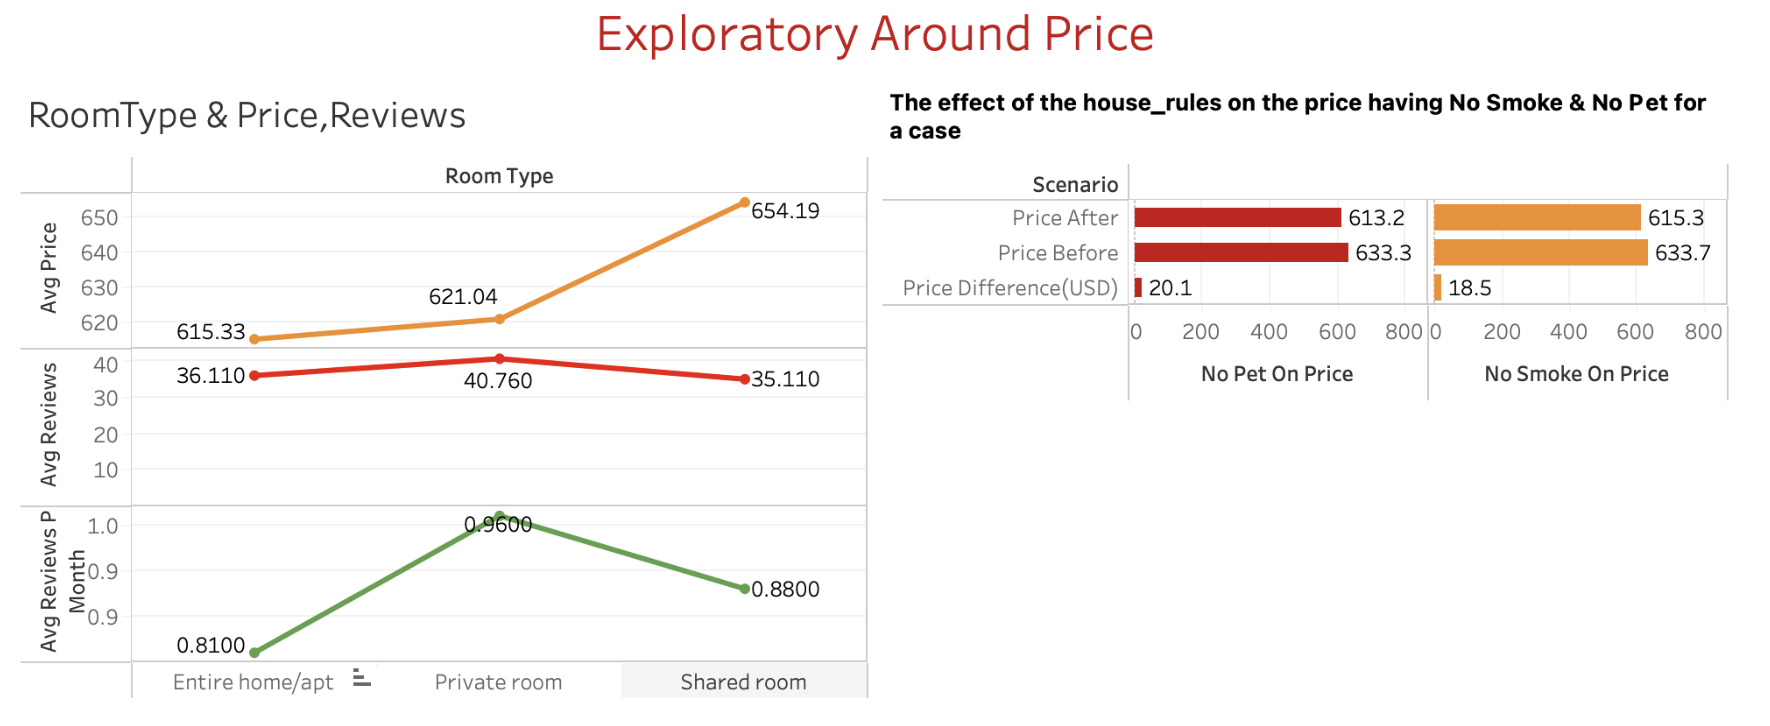

## 3. Scenario Analysis

### 3.1 Scenario 1: For travelers have different preference on room type

In this scenario, we want to analyze Airbnb performance on different consumers target. 

<b>Focus on flexibility</b> We will target on travelers who weigh more on order flexibility. In this case, we want to see how consumer reflect on reviews based on different room types by narrowing down our analysis to minimun nights stay

<b>Focus on safety</b> We will target on travelers who weight more on safety. In this case, we want to see how review vary within different room type 
    
<b>Focus on price level</b> We will target on travelers who determine his decision with a budget constraint. In this case, we want to see the relationsihp between price level and room type

#### 3.1.1 Focus on flexibility

<font size = '3'>(1) minimun nights stay

To narrow down our analysis, we divided length of minimun stay into three categories which is long, moderate and short term. 

   - If the required minimum number of night stay is within 7 days, then it is categorized as ‘Short’.
   - If the required minimum number of night stay is less than 30 days, and more than or equal to 7 days, then it is categorized as ‘Moderate’.
   - If the required minimum number of night stay is within greater than or equal to 30 days, and less than or equal to 180 days, then it is categorized as ‘Long’.


In [ ]:
%%bigquery
select 
  case 
    when minimum_nights <= 180 and minimum_nights > 30 then 'Long'
    when minimum_nights <= 30 and minimum_nights > 7 then 'Moderate'
    when minimum_nights > 0 and minimum_nights <= 7 then 'Short'
  end as min_length_of_stay, 
  round(avg(review_rate_number), 2) as Average_Review_Rate,
  round(avg(number_of_reviews), 2) as Avg_number_review
from `ba775-team6.Airbnb_Newyork.bnb1`
WHERE minimum_nights <=180 and minimum_nights > 0 and neighbourhood_group IS NOT NULL
group by min_length_of_stay
order by Average_Review_Rate

Downloading: 100%|██████████| 3/3 [00:01<00:00,  2.09rows/s]


min_length_of_stay  Average_Review_Rate  Avg_number_review
0              Short                 2.99              41.36
1               Long                 3.05              23.10
2           Moderate                 3.07              16.19

By filtering on different length of stay requirement, we can conclude that - 

For traveler in New York city, they seems to have better experience with longer-term stay as average review rate is higher for listing with higher length of night stay requirement. 

However, at this stage, the trend is not significant by only 0.03-0.04 difference in average review rate. 

So we expect to see more significant difference in review score for different guest preference by adding other restriction as follows.


<font size = '3'> (2)adding room type as restriction on listing selection

In [ ]:
%%bigquery
WITH MinStayLength AS(
SELECT
  CASE 
    WHEN minimum_nights <= 180 AND minimum_nights >= 30 THEN 'Long'
    WHEN minimum_nights < 30 AND minimum_nights >= 7 THEN 'Moderate'
    WHEN minimum_nights > 0 AND minimum_nights < 7 THEN 'Short'
  END as min_length_of_stay, 
  room_type,
  ROUND(AVG(review_rate_number), 2) AS Average_Review_Rate,
FROM `ba775-team6.Airbnb_Newyork.bnb1`
WHERE minimum_nights <=180 AND minimum_nights > 0
GROUP BY room_type, min_length_of_stay
ORDER BY min_length_of_stay)

SELECT
  min_length_of_stay,
  ARRAY_AGG(room_type) AS room_type,
  ARRAY_AGG(Average_Review_Rate) AS Average_Review_Rate,
  FROM MinStayLength
GROUP BY min_length_of_stay


Downloading: 100%|██████████| 3/3 [00:01<00:00,  2.16rows/s]


min_length_of_stay                                     room_type  \
0               Long  [Private room, Entire home/apt, Shared room]   
1           Moderate  [Entire home/apt, Private room, Shared room]   
2              Short  [Entire home/apt, Private room, Shared room]   

  Average_Review_Rate  
0   [3.13, 3.05, 4.0]  
1  [3.02, 3.04, 3.23]  
2   [2.98, 3.0, 2.96]

By adding room type as another restriction, we can get following conclusion: 

For traveler who prefer <b>long-term stay (more than one week)</b>, <b>shared room</b> get most positive review feedback with a average 4 and 3.23 scores. And there is a trend that the average scores of shared room is higher than private room, which is higher than entire home/apt. 

Therefore, <b>for long-term traveler</b>, we can get the conclusion for their room preference, which is shared > entire > private

For traveler who prefer <b>short-term stay (less than one week) </b>, private room get highest review score while shared room ranked lowest. 

Therefore, for short-term traveler, we can get the conclusion for their room preference, which is private > entire home> shared

So for host who owned long-term listing, we would suggest host to post more shared room while for host who owned short-term listing, we would suggest host to post more private room


#### 3.1.2 Focus on safety

In [ ]:
%%bigquery
WITH room_type_verification 
AS(
    SELECT host_identity_verified,
    room_type,
    ROUND(AVG(price),2) AS average_price,
    ROUND(AVG(review_rate_number),2) AS average_review_score,
    ROUND(AVG(number_of_reviews),2) AS average_number_of_reviews
    FROM `ba775-team6.Airbnb_Newyork.bnb1`
    WHERE host_identity_verified IN ('unconfirmed','verified')
    GROUP BY host_identity_verified, room_type
    ORDER BY room_type, host_identity_verified, 
    average_review_score DESC 
)
SELECT room_type, 
ARRAY_AGG(host_identity_verified) AS host_verification, 
ARRAY_AGG(average_review_score) AS average_review_score,
ARRAY_AGG(average_number_of_reviews) AS average_number_of_reviews,
ARRAY_AGG(average_price) AS average_price
FROM room_type_verification 
GROUP BY room_type

Downloading: 100%|██████████| 3/3 [00:01<00:00,  2.18rows/s]


room_type        host_verification average_review_score  \
0  Entire home/apt  [unconfirmed, verified]         [2.96, 3.02]   
1     Private room  [unconfirmed, verified]          [3.01, 3.0]   
2      Shared room  [unconfirmed, verified]         [3.03, 3.01]   

  average_number_of_reviews     average_price  
0            [36.19, 35.35]  [614.37, 616.12]  
1            [39.77, 41.13]  [628.05, 613.72]  
2             [29.0, 41.15]  [678.89, 620.55]

For travelers who prefer entire home/apt, the average review score of verified hosts is higher than the unconfirmed one while the average number of reviews is lower than the unconfirmed one with a higher price. 

For travelers who prefer private room type, the average review score of verified is lower than unconfirmed one while the average number of review is higher than unconfirmed one with a lower price

For users who prefer shared room, the average review score of verified hosts is lower than the unconfirmed one. While average number of review is much higher than unconfirmed with a lower price

In fact, we can conclude from the number of reviews of private rooms and shared rooms that people prefer verified hosts because verified hosts are probably more secure.

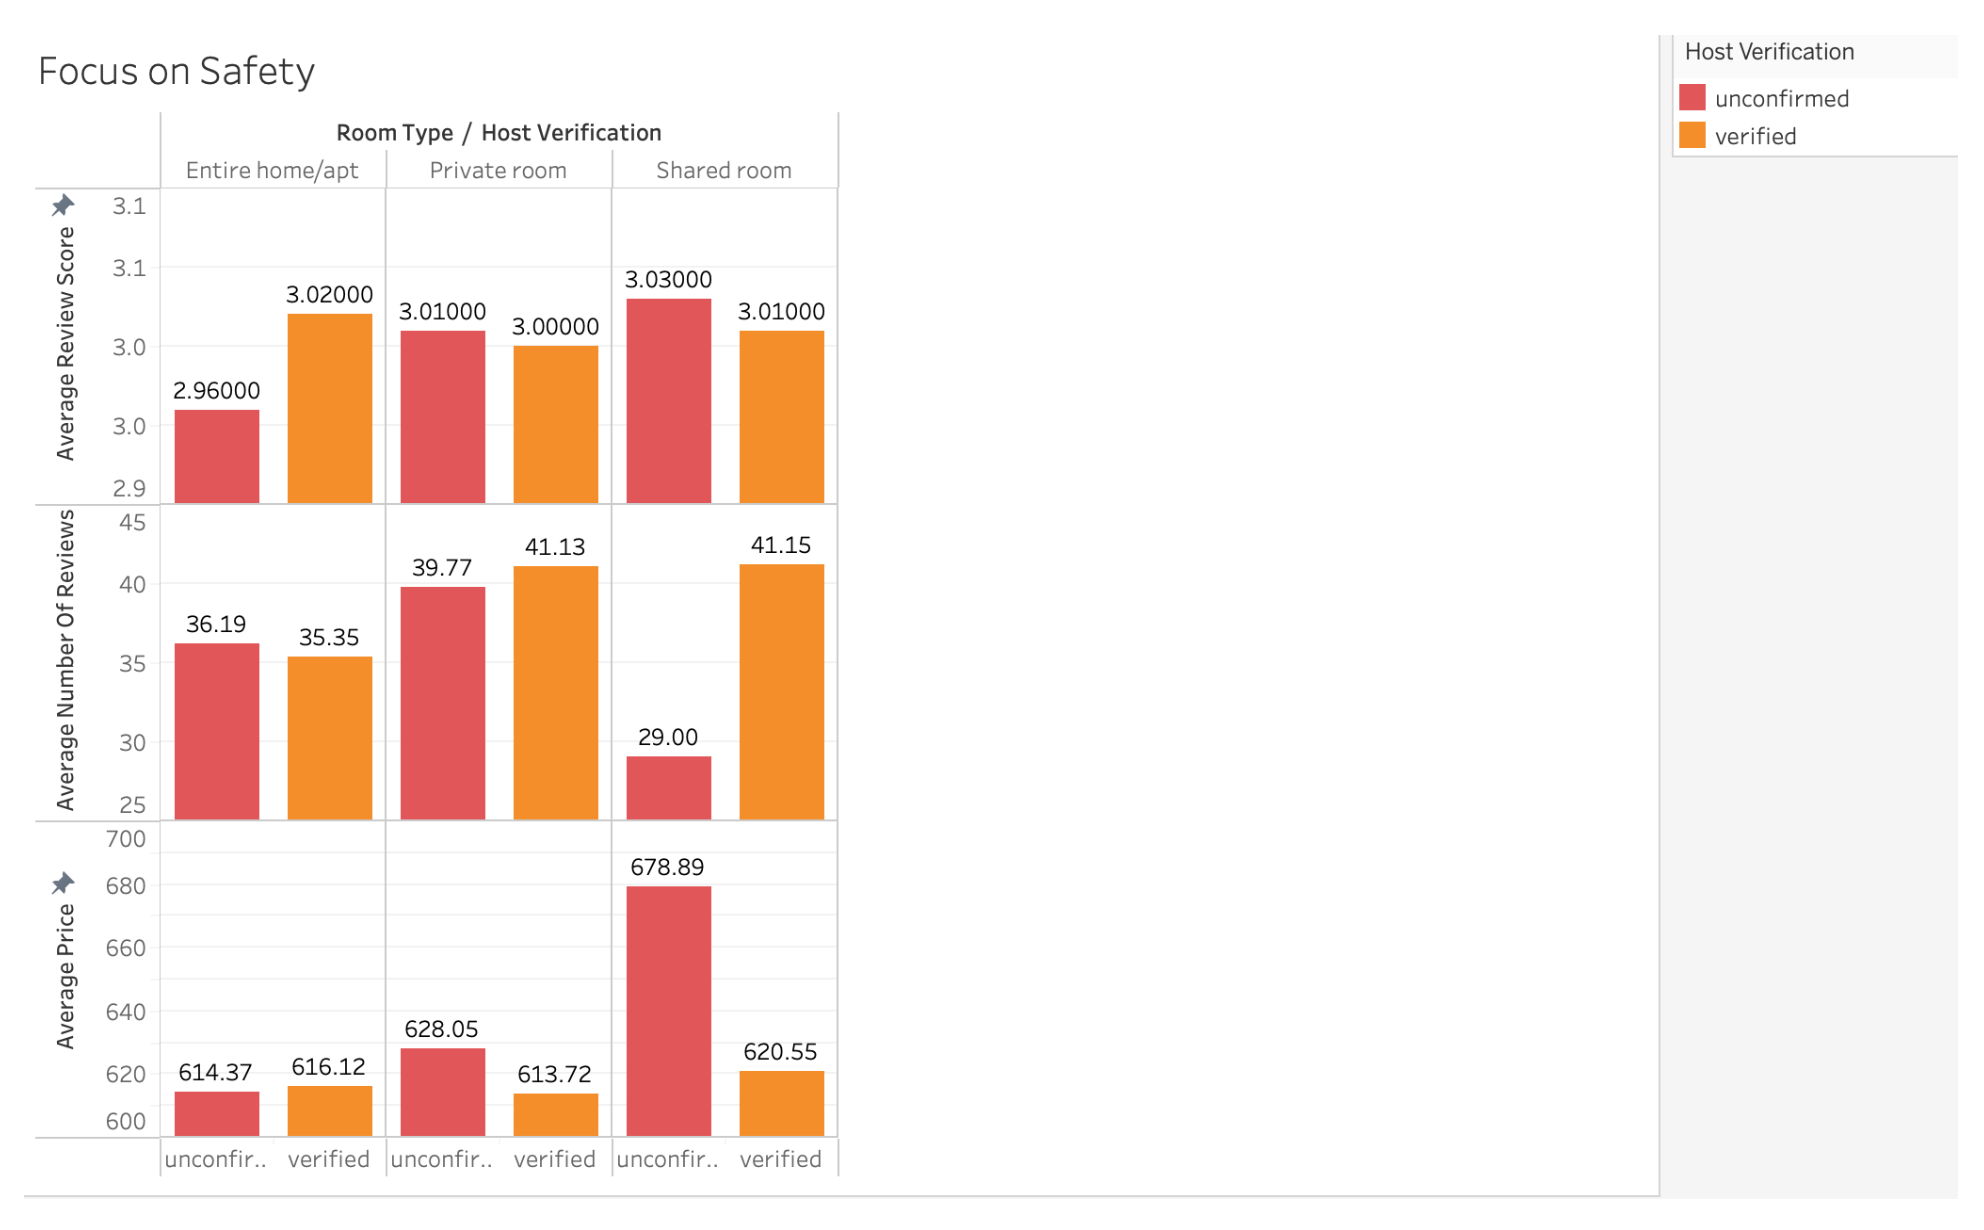

#### 3.1.3 Focus on price level


To better analyze price, we add a new column named 'price relative ratio'. Price relative ratio is calculated using the price of a particular listing divided by the average price of listing in its neighbourhood_group and respective room type. This measurement is important because, using this ratio, we can grasp at least approximately the level of how the price is deviated from the average, which is calculated based on the listing's neighbourhood_group and room type.

However, since we already added this column in our dataset through bigquery and so we cannot run the query in jupyter notebook. So just attached our code below for reference. 

    CREATE OR REPLACE TABLE `ba775-team6.Airbnb_Newyork.bnb1`
    AS(
    SELECT *,
    ROUND(price/(SELECT AVG(price)
      FROM `ba775-team6.Airbnb_Newyork.bnb` a
      WHERE a.neighbourhood_group = b.neighbourhood_group AND a.room_type = b.room_type
      GROUP BY neighbourhood_group, room_type), 2
                    ) AS price_relative_to_average
    FROM `ba775-team6.Airbnb_Newyork.bnb1` b)

- To narrow down our analysis, we divided price into three different price levels 
    - price_level_1 is defined when price relative ratio > 1.4. It might serve the travelers who are able to or willing to afford a much higher price.
    - price_level_2 is defined when price relative ratio <= 1.4 and > 0.7. 
    - price_level_3 is defined when price relative ratio <= 0.7
   

Putting ourselves into the shoes of a customer who is searching for an airbnb listing, we identify two major factors that could determine his or her decision.
- First, it might be the price level the listing is at. In other words, the customers might have a budget already, so as long as the spending is kept within that budget, different room types might not have a significant impact, at least initially. Among the customers who are willing to pay a price at price level 1 (relative price ratio > 1.4), data in this table reflect to us that private rooms or shared rooms are more frequently booked than the entire home/apt type is. However, when the price is at price level 2 or 3, we can see that there is no evidently less availability for a certain room type.


In [ ]:
%%bigquery
WITH pricelevel AS(
SELECT
  room_type,
  CASE 
    WHEN price_relative_to_average > 1.4 THEN 'Price_Level_1'
    WHEN 0.7 < price_relative_to_average AND price_relative_to_average <= 1.4 THEN 'Price_Level_2'
    WHEN price_relative_to_average <= 0.7 THEN 'Price_Level_3'
END AS Price_Level,
  ROUND(AVG(review_rate_number), 2) AS Average_Review_Rate,
  ROUND(AVG(availability_365), 2) AS Average_Availability365
FROM `ba775-team6.Airbnb_Newyork.bnb1`
WHERE price_relative_to_average IS NOT NULL AND 
      cancellation_policy IS NOT NULL AND 
      availability_365 > 0 AND availability_365 <= 365
GROUP BY room_type, Price_Level
ORDER BY room_type, Price_Level)

SELECT
  Price_Level,
  ARRAY_AGG(room_type) AS room_type,
  ARRAY_AGG(Average_Review_Rate) AS Average_Review_Rate,
  ARRAY_AGG(Average_Availability365) AS Average_Availability365
  FROM pricelevel
GROUP BY Price_Level

Downloading: 100%|██████████| 3/3 [00:01<00:00,  1.61rows/s]


Price_Level                                     room_type  \
0  Price_Level_1  [Entire home/apt, Private room, Shared room]   
1  Price_Level_2  [Entire home/apt, Private room, Shared room]   
2  Price_Level_3  [Entire home/apt, Private room, Shared room]   

  Average_Review_Rate   Average_Availability365  
0   [2.94, 3.0, 2.98]   [187.1, 179.46, 180.04]  
1   [3.01, 3.0, 3.06]  [183.69, 183.91, 188.56]  
2  [2.98, 3.02, 3.12]   [182.72, 182.4, 180.07]

- Second, the customers might start the search with a specific room type option in mind. If that is the case, we can see that the type of shared room has the most evident differentiation on average review rate number, on which we interpret as the difference among price level might have a larger impact on customer review/satisfaction when they stayed in listings belonging to ‘shared room’ type.  Furthermore, there is less availability of shared room type when the listings’ price is either significantly higher than average or comparatively lower than average. This could indicate that customers would rather opt  for either high-price shared room or low-price shared room.


In [ ]:
%%bigquery
WITH pricelevel AS(
SELECT
  room_type,
  CASE 
    WHEN price_relative_to_average > 1.4 THEN 'Price_Level_1'
    WHEN 0.7 < price_relative_to_average AND price_relative_to_average <= 1.4 THEN 'Price_Level_2'
    WHEN price_relative_to_average <= 0.7 THEN 'Price_Level_3'
END AS Price_Level,
  ROUND(AVG(review_rate_number), 2) AS Average_Review_Rate,
  ROUND(AVG(availability_365), 2) AS Average_Availability365
FROM `ba775-team6.Airbnb_Newyork.bnb1`
WHERE price_relative_to_average IS NOT NULL AND 
      cancellation_policy IS NOT NULL AND 
      availability_365 > 0 AND availability_365 <= 365
GROUP BY room_type, Price_Level
ORDER BY room_type, Price_Level)

SELECT
  room_type,
  ARRAY_AGG(Price_Level) AS Price_Level,
  ARRAY_AGG(Average_Review_Rate) AS Average_Review_Rate,
  ARRAY_AGG(Average_Availability365) AS Average_Availability365
  FROM pricelevel
GROUP BY room_type

Downloading: 100%|██████████| 3/3 [00:01<00:00,  2.07rows/s]


room_type                                    Price_Level  \
0  Entire home/apt  [Price_Level_1, Price_Level_2, Price_Level_3]   
1     Private room  [Price_Level_1, Price_Level_2, Price_Level_3]   
2      Shared room  [Price_Level_1, Price_Level_2, Price_Level_3]   

  Average_Review_Rate   Average_Availability365  
0  [2.94, 3.01, 2.98]   [187.1, 183.69, 182.72]  
1    [3.0, 3.0, 3.02]   [179.46, 183.91, 182.4]  
2  [2.98, 3.06, 3.12]  [180.04, 188.56, 180.07]

### 3.2 Scenario 2: For traveler who do not have a flexible plan
- for this type of travelers, cancellation policy is important because it will increase the cost to travel if the schedule change. While minimum_nights can reflect listing's booking flexibility, we use cancellation policy and minimum_nights as our focus and then see review and availability may vary within different length of night stay and cancellation policy

In [ ]:
%%bigquery
WITH cpolicy AS(
SELECT
  CASE 
    WHEN minimum_nights <= 180 AND minimum_nights >= 30 THEN 'Long'
    WHEN minimum_nights < 30 AND minimum_nights >= 7 THEN 'Moderate'
    WHEN minimum_nights > 0 AND minimum_nights < 7 THEN 'Short'
  END AS min_length_of_stay, 
  cancellation_policy,
  ROUND(AVG(review_rate_number), 2) AS Average_Review_Rate,
  ROUND(AVG(price_relative_to_average), 2) AS Relative_Price_Ratio,
  ROUND(AVG(price), 2) AS Average_Price,
  ROUND(AVG(availability_365), 2) AS Average_Availability365
FROM `ba775-team6.Airbnb_Newyork.bnb1`
WHERE cancellation_policy IS NOT NULL AND 
      minimum_nights <=180 AND minimum_nights > 0 AND 
      availability_365 > 0 AND availability_365 <= 365
GROUP BY min_length_of_stay, cancellation_policy
ORDER BY min_length_of_stay, Average_Availability365 ASC)

SELECT
  min_length_of_stay,
  ARRAY_AGG(cancellation_policy) AS cancellation_policy,
  ARRAY_AGG(Average_Review_Rate) AS Average_Review_Rate,
  ARRAY_AGG(Average_Availability365) AS Average_Availability365
  FROM cpolicy
GROUP BY min_length_of_stay

Downloading: 100%|██████████| 3/3 [00:01<00:00,  2.30rows/s]


min_length_of_stay           cancellation_policy Average_Review_Rate  \
0               Long  [flexible, strict, moderate]  [2.97, 3.17, 3.06]   
1           Moderate  [flexible, moderate, strict]  [3.03, 3.06, 3.03]   
2              Short  [flexible, moderate, strict]  [2.99, 2.97, 2.99]   

    Average_Availability365  
0  [178.19, 179.19, 187.53]  
1  [178.69, 184.81, 190.65]  
2  [182.31, 183.51, 184.51]

Regardless of the required minimum number of night to stay, listings with flexible cancellation policy have less availability. In other words, listings with flexible cancellation policy have more occupacy in future and it is more popular. It does accord with common sense that consumer will prefer to order listing with flexible cancellation policy. 


- Long - flexible 178.19 
- Moderate - flexible :178.69 
- Short - flexible : 182.31

And yet, it is evident that when the required length of stay is long, the flexible cancellation policy listings get an average review score = 2.97 while the strict cancellation policy listings get an average review score = 3.17. At the same time, and possibly as a result, the average availability for listings with flexible or strict cancellation policy is approximately the same. 
It might indicate that when the required length of stay is long, guests would start to weigh more on listings’ review rate.


### 3.3 Scenario 3: Exploring the most preferred ideal top-priced Airbnb listings for luxury travelers

In order to find the best airbnb property:- comparing airbnb price with ideal scenario of choosing Entire home/apt

- Room Type = Entire home/apt
- Review Rate = 4
- instant_bookable = Y
- Service fee = Variable
- Host Identity = verified

In [ ]:
%%bigquery
SELECT 
name,host_name,host_identity_verified,service_fee,
price,room_type,
review_rate_number, 
neighbourhood_group,
neighbourhood
FROM `ba775-team6.Airbnb_Newyork.bnb1` 
WHERE room_type = "Entire home/apt"
AND review_rate_number = 4
AND host_identity_verified = "verified"
ORDER BY price DESC 
LIMIT 5 

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.75rows/s]


name host_name host_identity_verified  \
0   1BR GARDEN APT 25 MIN TO MANHATTAN      Anna               verified   
1   Enjoy a comfy apartment on the UWS       Gat               verified   
2   Cute apartment with 2 big bedrooms   Walther               verified   
3  Cosy 2 bed, Gramercy, NYC Apartment   Charlie               verified   
4  Cozy apt next to park & train for 4    Aubrey               verified   

   service_fee  price        room_type  review_rate_number  \
0          240   1200  Entire home/apt                   4   
1          240   1199  Entire home/apt                   4   
2          239   1197  Entire home/apt                   4   
3          239   1197  Entire home/apt                   4   
4          239   1196  Entire home/apt                   4   

  neighbourhood_group              neighbourhood  
0            Brooklyn              East Flatbush  
1           Manhattan            Upper West Side  
2              Queens           Long Island City  
3           Manhattan               Civic Center  
4            Brooklyn  Prospect-Lefferts Gardens

Therefore the most preferred ideal property in NewYork with MAX Price is "1BR GARDEN APT 25 MIN TO MANHATTAN" with listing cost as 1200 USD - "Entire home/apt and 4 star rating

Hence :-  In New York the top most expensive valuable property is -

* located in Brooklyn
*  named as '1BR GARDEN APT 25 MIN TO MANHATTAN'
*  Owned by Anna
* with Price 1200 USD
* having rating as 4

One interesting finding - although this listing located in Brooklyn, its title highlights the distance to Manhattan. From this kind of host behavior, we can intepret that the host use Manhattan to increase its click-through rate of listing as the listing will be labeled with both Manhattan and Brooklyn. 

So it will be a great attraction for vistors who want to live near the center of the City since Manhattan serves as NYC's business center while Brooklyn is the geographic center of NYC.

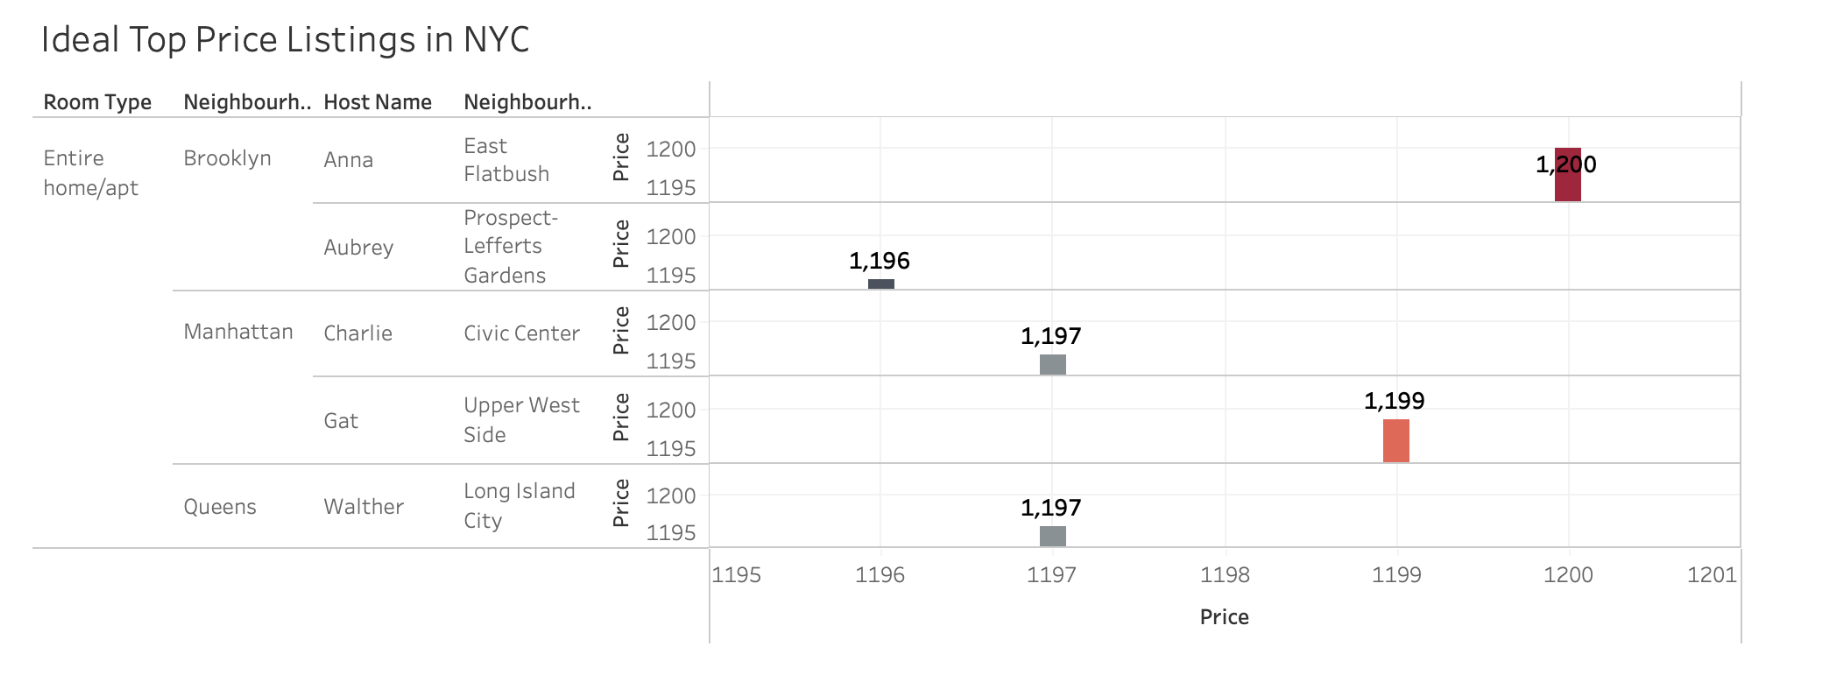

Considering this case, we can draw a word cloud on listing name to explore how host personalized their name and see if any word is used frequently

In [ ]:
%%bigquery 
SELECT name
FROM `ba775-team6.Airbnb_Newyork.bnb1`
WHERE review_rate_number = 5
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.80rows/s]


name
0                  Two bedroom in Prime East Village
1  Peaceful Artist Bedroomâ€”Just 30 Min to Manha...
2                  Studio next to Washington Sq Park
3  Modern comfort in art infused landmark Brownstone
4                          Upper East Side 1-Bedroom

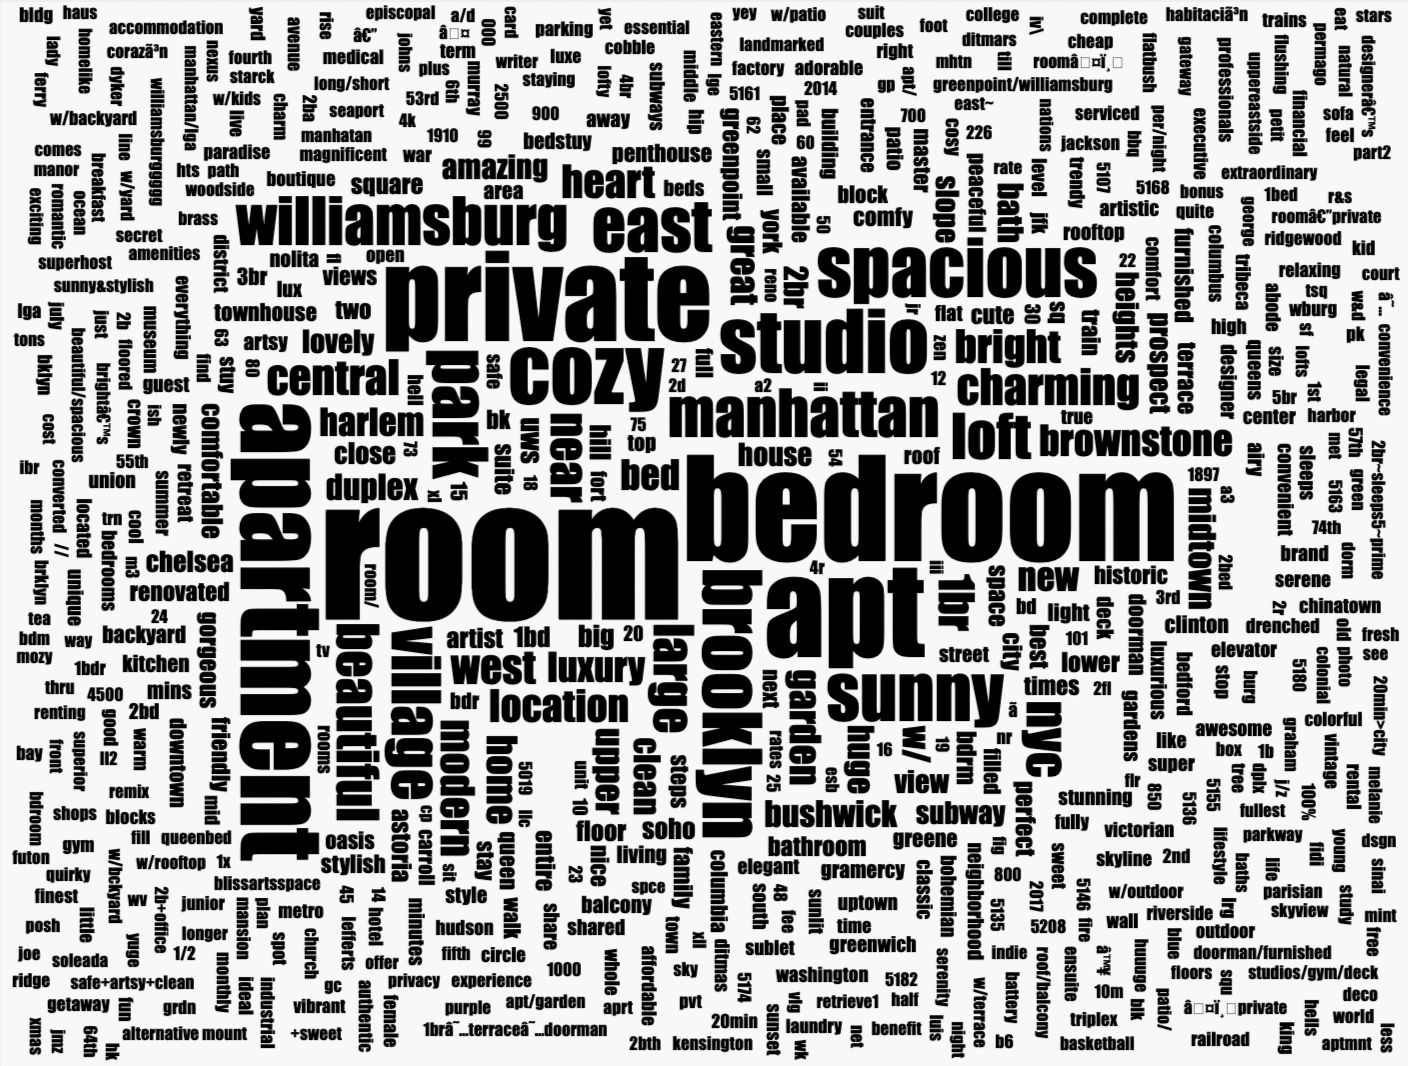

According to the word cloud, we can see that Brooklyn, central, manhattan, Williamsburg, east are in high frequency. So host can use location as a keyword to attract users to click through the listings search. 

In addition to location, we can also obtain some other patterns from this word cloud. For example, a host can also highlight feature of his listing's fitment by using words like 'bath','roof'and 'garden'. Type of house can also a feature for host to highlight in the listing's name in order to attract traveler with different room type preference, such as 'loft', 'apt', 'private‘, spacious and 'luxury'. Emotional connection is also a strategy that can be usesd for host in personlizing listing's name. For example, host can use word like 'cozy', 'sunny', 'charming' and 'elegant' to attract travelers who seeking an unique living style. 

## 4. Conclusion
Based on our analysis, which focuses on Airbnb host performance in New York city, we make some conclusions, which in turn should provide insight on improvement on host performance:
   
1. The names of listings could play an important role in getting more attraction and guests. Take, a listing located in Brooklyn, as an example, highlighting the distance to Manhattan in listings name might help to attract more customers, as Manhattan is the center providing various activities in New York city. 

2. Host verification could be crucial in gaining more guests and higher bookings rate in that guests might consider the safety level is higher when the host is verified.

3. Having a laundry and kitchen facility improves guests’ experience and subsequently the listing’s review rate. 

4. Hosts of shared rooms should notice that listings in this type are usually higher than or lower than average. This is not to say that hosts should intentionally manipulate the price without any other strategies, but it might be better for them to make prices accordingly: if the listing has a much higher-than-average price, which is a price able to attract customers, the listing should be equipped with corresponding amenities. And vice versa, for hosts who do not intend to significantly increase the guests’ living experience, perhaps they should price the listings lower than average.

5. As mentioned earlier in one of our project subsections, regardless of the required minimum number of nights to stay, listings with flexible cancellation policy have less availability. Therefore, hosts could make their cancellation policy more flexible if situations allow. Furthermore, listings with either flexible or strict cancellation policy are more popular within the same category (min_length_of_stay = ‘Long’). It would become an unsurprising finding when we combine these listings’ average review rate score, which indicates that when the required length of stay is long, guests would start to weigh more on listings’ review rate.


## 5. Limitation
If time is not limited, we might be able to use machine learning techniques such as Natural Language Processing to capture preferable patterns for naming listings or formatting house rules.

To gather more insight on how to improve host performance, we could have joined other datasets as well. For instance, transportation, air quality, and criminal records in different neighbourhoods or areas can all contribute to the popularity of a listing. These could be all become valuable inputs for any further analysis.

As our data is limited and the data source does not give a column for the number of transactions per Airbnb, we can only extrapolate from the number of reviews, so errors may occur.

## 6. Dashboard

In [1]:
%%html
<a href="https://public.tableau.com/app/profile/prateek.naharia/viz/FactorsAffectingAIRBNBListingInNewYorkCity/NYC_AIRBNB">Tableau Dashboard Airbnb NYC</a>


Dashboard Link : https://public.tableau.com/app/profile/prateek.naharia/viz/FactorsAffectingAIRBNBListingInNewYorkCity/NYC_AIRBNB

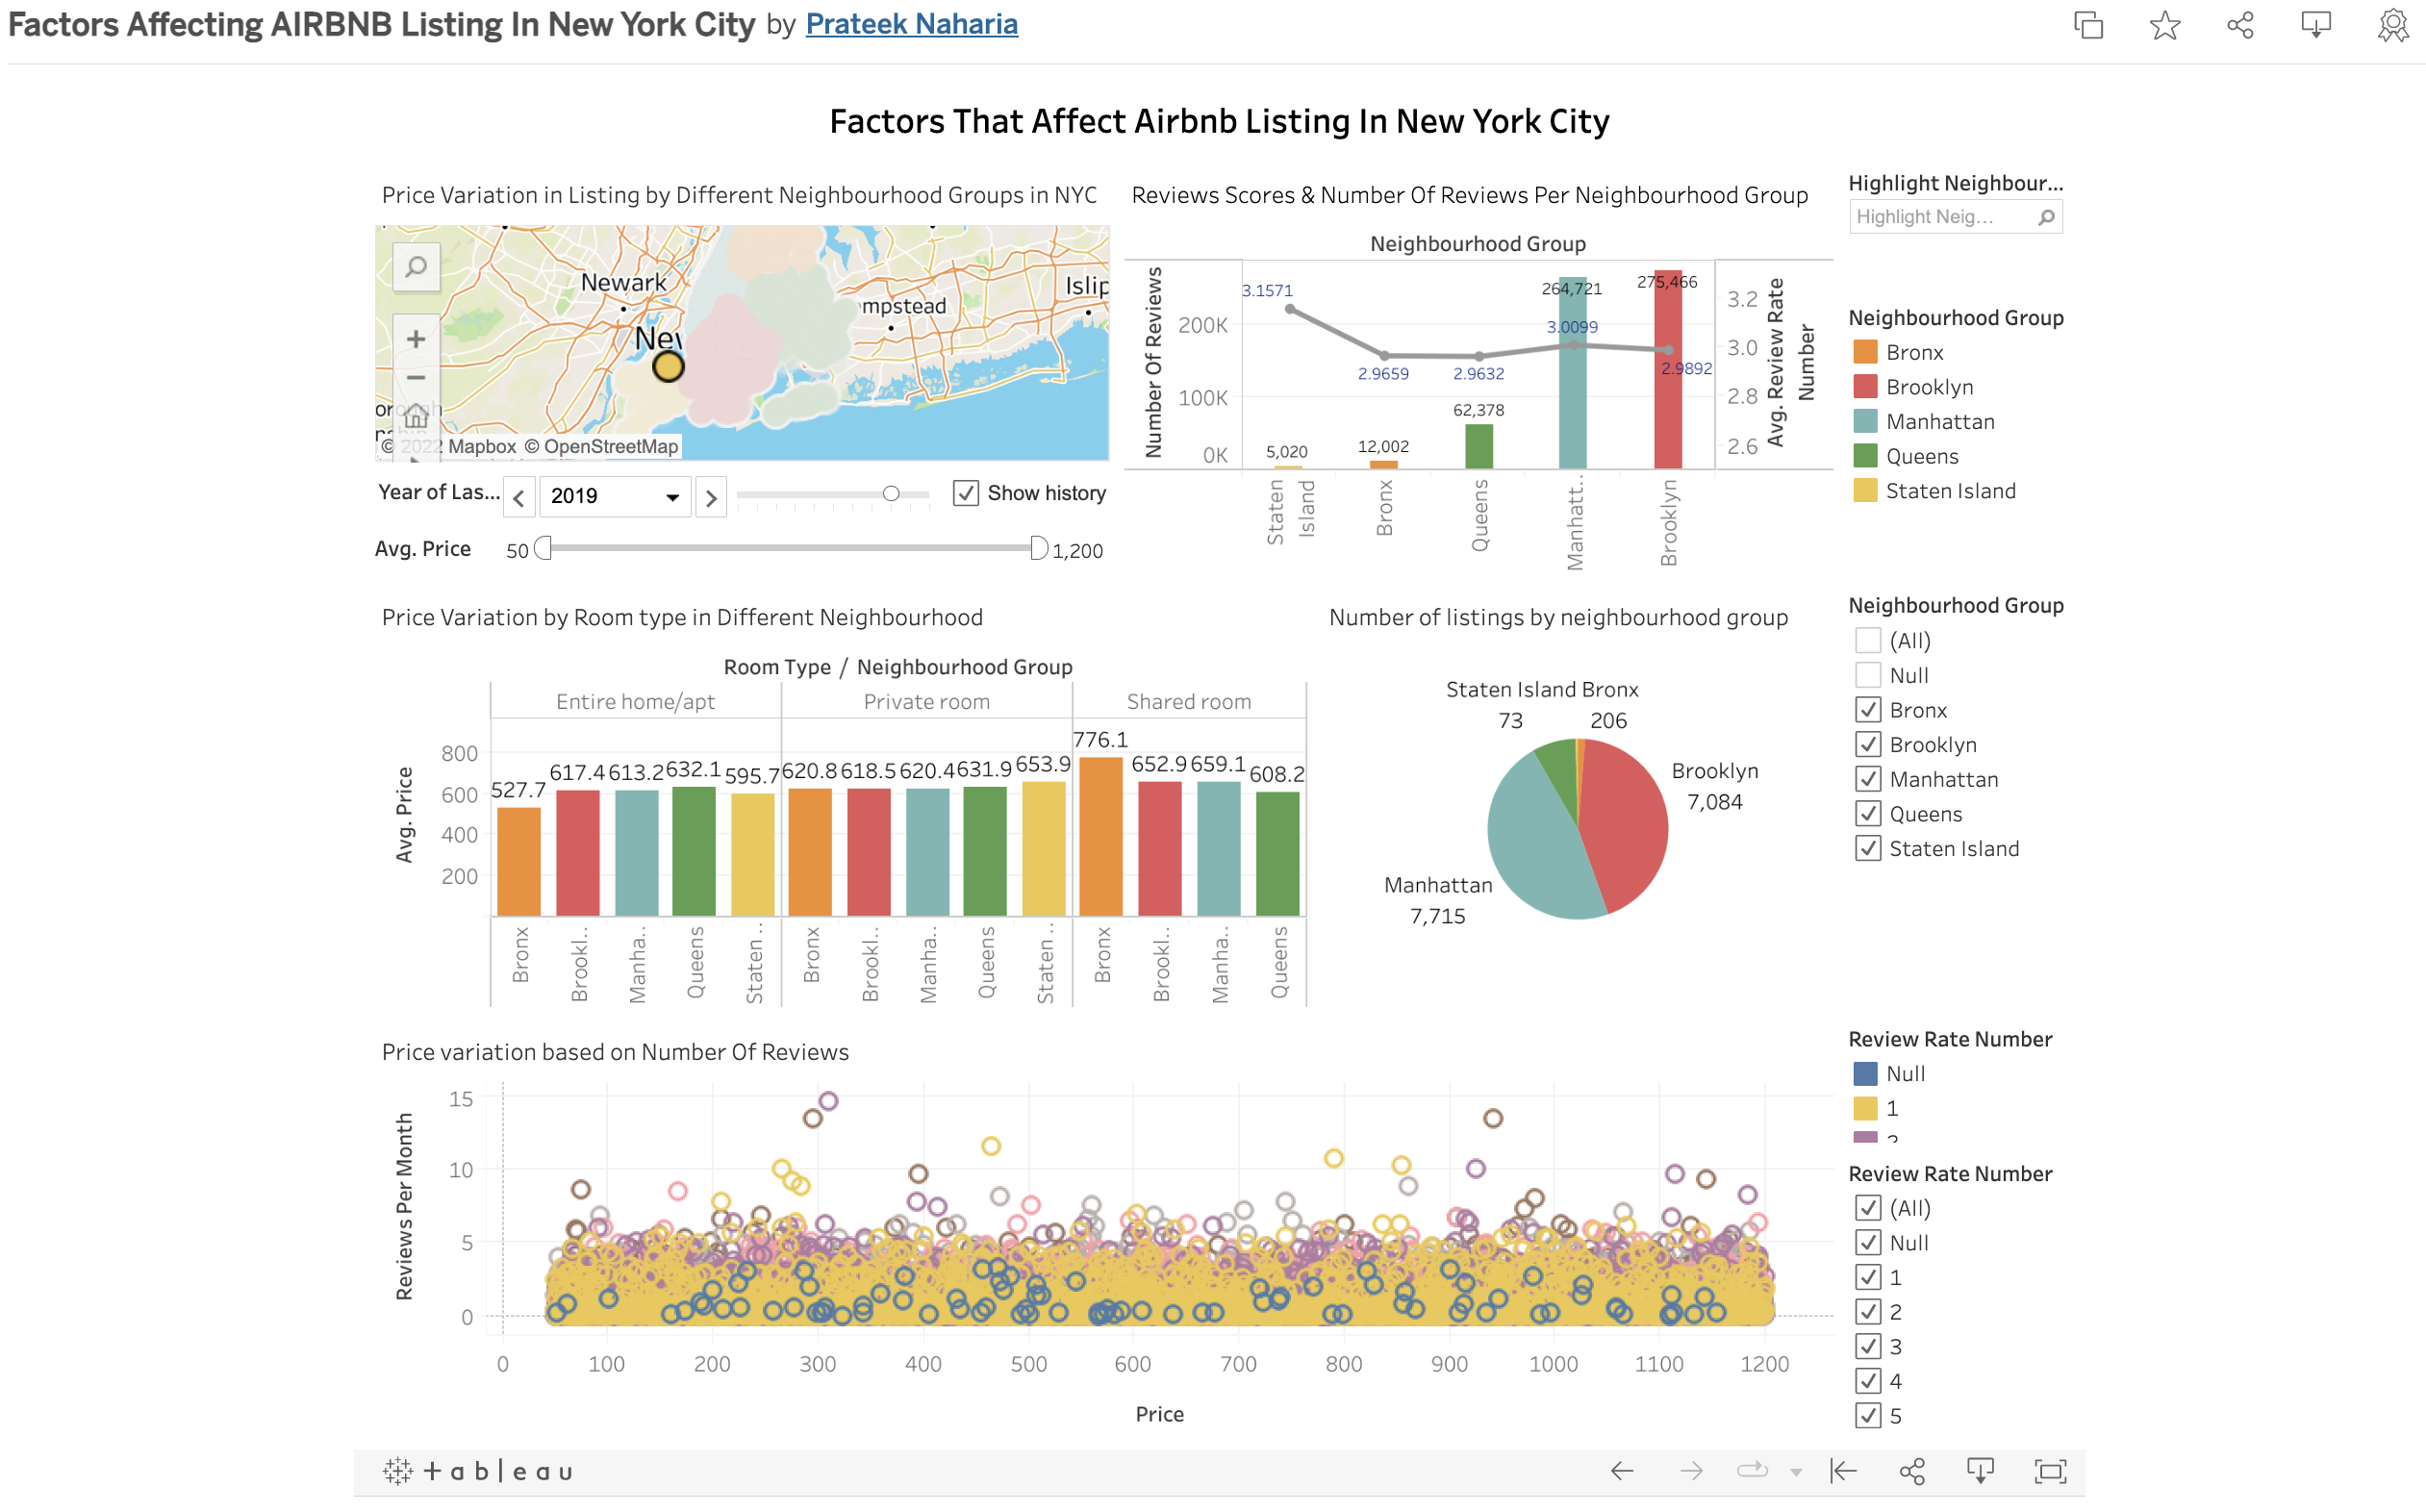

## 7. Citation
Shirely Chen. How to Analyze Airbnb Performance Data in the Right Way. "https://medium.com/analytics-vidhya/how-to-analyze-airbnb-performance-data-in-the-right-way-b83f3dad1458"

BnB Facts. "https://bnbfacts.com/how-instant-book-works-on-airbnb/"

Airbnb Help Center. "https://www.airbnb.com/help/all-topics?audience=home_host"

Airbnb Public Dataset. "insideairbnb.com/new-york-city/"

Google Cloud. "https://cloud.google.com/bigquery/docs/reference/standard-sql/aggregate_functions"

GeeksforGeeks. "https://www.geeksforgeeks.org/insert-image-in-a-jupyter-notebook/"